In [13]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# deep learning and Pytorch


In [2]:
import torch
import torch.nn as nn
from torchvision.transforms import Compose
print(torch.__version__)           # 显示版本
print(torch.cuda.is_available())   # True 表示 GPU 可用


2.5.1
False


In [5]:
nn.Linear(in_features=10, out_features=5)  # 全连接层

Linear(in_features=10, out_features=5, bias=True)

## Tensor

### type of tensor tensor

In [7]:
a = torch.tensor([1.2, 3.4])
print ("a.tyoe:", a.dtype)
print ("a.long()方法", a.long().dtype)  # 转为 long 类型

a.tyoe: torch.float32
a.long()方法 torch.int64


In [8]:
torch.get_default_dtype()  # 获取默认浮点类型


torch.float32

In [3]:
A = torch.tensor([[1.0, 2.0],[2, 2]])
A

tensor([[1., 2.],
        [2., 2.]])

In [15]:
A.shape
A.size()
A.numel()  # 元素个数

torch.Size([2, 2])

torch.Size([2, 2])

4

### generate tensor

In [20]:
B = torch.tensor([1,2,3], dtype = torch.float32, requires_grad = True)
B

tensor([1., 2., 3.], requires_grad=True)

In [ ]:
y = B.pow(2).sum()
y.backward() # 反向传播
B.grad

tensor([2., 4., 6.])

In [24]:
C = torch.Tensor([1,2,3,4])
C
D = torch.Tensor(2,3)
D

tensor([1., 2., 3., 4.])

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [27]:
torch.ones_like(D)  # 创建一个和 D 形状相同的全1张量
torch.zeros_like(D) # 创建一个和 D 形状相同的全0张量
torch.rand_like(D) # 创建一个和 D 形状相同的标准正态分布张量

tensor([[1., 1., 1.],
        [1., 1., 1.]])

tensor([[0., 0., 0.],
        [0., 0., 0.]])

tensor([[0.8585, 0.4636, 0.9625],
        [0.6143, 0.3372, 0.6592]])

In [29]:
import numpy as np
F = np.ones((3, 3))
Ftensor = torch.as_tensor(F)
Ftensor

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [30]:
Ftensor = torch.from_numpy(F)
Ftensor

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [31]:
Ftensor.numpy()  # 转为 numpy 数组

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [37]:
torch.manual_seed(123)
A = torch.normal(mean = 0.0, std = torch.tensor(1.0))
A
A = torch.normal(mean = 0.0, std = torch.arange(1, 5.0))
A
A = torch.normal(mean = torch.arange(1, 5.0), std = torch.arange(1, 5.0))
A

tensor(-0.1115)

tensor([ 0.1204, -0.7393, -0.7213, -4.7877])

tensor([1.2093, 0.0553, 0.7349, 5.2956])

In [ ]:
torch.manual_seed(123)
B = torch.rand(3, 4)
B # 12个元素都是[0,1)均匀分布随机数

tensor([[0.2961, 0.5166, 0.2517, 0.6886],
        [0.0740, 0.8665, 0.1366, 0.1025],
        [0.1841, 0.7264, 0.3153, 0.6871]])

In [39]:
torch.manual_seed(123)
C = torch.ones(2,3)
D = torch.rand_like(C)
D

tensor([[0.2961, 0.5166, 0.2517],
        [0.6886, 0.0740, 0.8665]])

In [40]:
print(torch.randn(3,3))
print(torch.randn_like(C))

tensor([[ 0.9447,  0.6217, -1.3501],
        [-0.1881, -2.3891, -0.4759],
        [ 1.7603,  0.6547,  0.5490]])
tensor([[ 0.3671,  0.1219,  0.6466],
        [-1.4168,  0.8429, -0.6307]])


In [ ]:
torch.manual_seed(123) # 0到9,10个数字随机排序
torch.randperm(10) 

tensor([2, 0, 8, 1, 3, 7, 4, 9, 5, 6])

In [44]:
torch.arange(start=0, end=10, step=2)  # 从0开始到10，步长为2
torch.linspace(start=1, end=10, steps=5)  # 从1开始到10，分成5份
torch.logspace(start=0.1, end=1.0, steps=5)  # 从10^0.1开始到10^1.0，分成5份

tensor([0, 2, 4, 6, 8])

tensor([ 1.0000,  3.2500,  5.5000,  7.7500, 10.0000])

tensor([ 1.2589,  2.1135,  3.5481,  5.9566, 10.0000])

In [45]:
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

### manipulate tensor

In [57]:
## tensor.reshape()
A = torch.arange(12.0)
A
A.reshape(3,4)

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [ ]:
torch.reshape(input = A, shape = (4,3))  # 4行3列
torch.reshape(input = A, shape = (2,-1))  # 2行，-1表示自动计算列数
A.resize_(2,6) # reseize_会改变原张量A的形状,而reshape不会


tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.],
        [ 6.,  7.,  8.,  9., 10., 11.]])

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.],
        [ 6.,  7.,  8.,  9., 10., 11.]])

In [ ]:
B = torch.arange(10.0, 19.0).reshape(3,3)
A.resize_as_(B)  # 改变A的形状和B一样, A丢失了一下元素
B

tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]])

tensor([[10., 11., 12.],
        [13., 14., 15.],
        [16., 17., 18.]])

In [63]:
A = torch.arange(12.0).reshape(2,6)
B = torch.unsqueeze(A, dim = 0)  # 在第0维增加一个维度
B.shape

torch.Size([1, 2, 6])

In [70]:
C = B.unsqueeze(dim = 3)  # 在第3维增加一个维度
print("C.shape:", C.shape)
D = torch.squeeze(C)  # 去掉所有维度为1的维度
print("D.shape:", D.shape)
E = torch.squeeze(C, dim = 0)  # 去掉第0维度为1的维度
print("E.shape:", E.shape)

C.shape: torch.Size([1, 2, 6, 1])
D.shape: torch.Size([2, 6])
E.shape: torch.Size([2, 6, 1])


In [71]:
A = torch.arange(3)
B = A.expand(3, -1)
B

tensor([[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]])

In [75]:
C = torch.arange(6).reshape(2,3)
B = A.expand_as(C)
B
B.shape

tensor([[0, 1, 2],
        [0, 1, 2]])

torch.Size([2, 3])

In [ ]:
D = B.repeat(1,2,2)
print(D)
print(D.shape) # 1 = 1*1 4 = 2*2 6 = 3*2


tensor([[[0, 1, 2, 0, 1, 2],
         [0, 1, 2, 0, 1, 2],
         [0, 1, 2, 0, 1, 2],
         [0, 1, 2, 0, 1, 2]]])
torch.Size([1, 4, 6])


In [ ]:
A = torch.arange(12).reshape(1, 3 ,4)
A # 第一个括号只有一个块，所以0维是1，第二个括号是3，第三个括号是4

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]]])

## torch.nn 模块



In [ ]:
## use a image to show convolution

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from PIL import Image

Matplotlib is building the font cache; this may take a moment.


<Figure size 600x600 with 0 Axes>

(-0.5, 4095.5, 2303.5, -0.5)

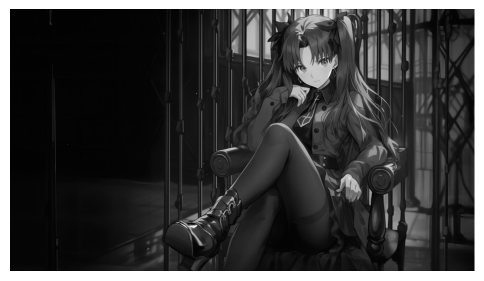

In [83]:
# read a image and convert to grayscale, then convert to tensor

myim = Image.open('data/WechatIMG13.jpg')

myimgray = np.array(myim.convert("L"), dtype = np.float32)

# visualize the grayscale image

plt.figure(figsize=(6,6))
plt.imshow(myimgray, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

In [84]:
# transform to tensor

imh, imw = myimgray.shape
myimgray_t = torch.from_numpy(myimgray.reshape((1, 1, imh, imw))) 
myimgray_t.shape

torch.Size([1, 1, 2304, 4096])

In [98]:
kersize = 5  ## 定义边缘检测卷积核， 并将维度处理为 （1,1, 5, 5）
ker = torch.ones(kersize, kersize, dtype = torch.float32)*-1
ker[2,2] = 24
ker = ker.reshape((1,1, kersize, kersize))
ker

## convolution operation
conv2d = nn.Conv2d(1,2,(kersize, kersize), bias = False)

## 设置卷积时候使用的核，都一个核使用边缘检测核
conv2d.weight.data[0] = ker
## 对灰度图像卷积
imconv2dout = conv2d(myimgray_t)
## 对卷积之后的输出进行维度压缩
imconv2dout_im = imconv2dout.data.squeeze()
print("卷积后尺寸：", imconv2dout_im.shape)

tensor([[[[-1., -1., -1., -1., -1.],
          [-1., -1., -1., -1., -1.],
          [-1., -1., 24., -1., -1.],
          [-1., -1., -1., -1., -1.],
          [-1., -1., -1., -1., -1.]]]])

卷积后尺寸： torch.Size([2, 2300, 4092])


<Figure size 1200x600 with 0 Axes>

<Axes: >

(-0.5, 4091.5, 2299.5, -0.5)

<Axes: >

(-0.5, 4091.5, 2299.5, -0.5)

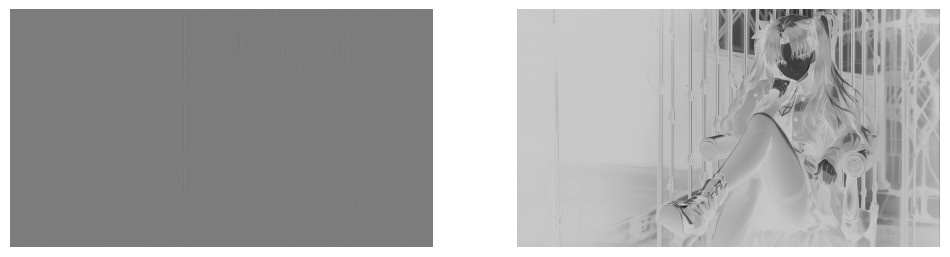

In [100]:
## visualize the convolution output
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(imconv2dout_im[0], cmap = plt.cm.gray)
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(imconv2dout_im[1], cmap = plt.cm.gray)
plt.axis("off")
plt.show()